In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
twitch_stream = pd.read_csv('stream.csv')

In [3]:
games = sorted(twitch_stream.game.dropna().unique())
viewers = twitch_stream.game.groupby(twitch_stream.game).count()

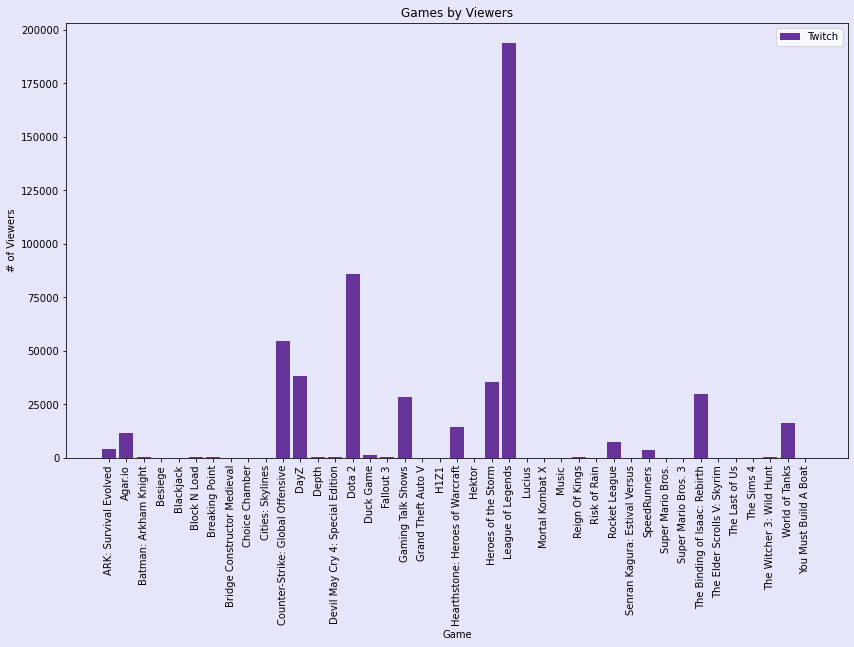

<Figure size 432x288 with 0 Axes>

In [4]:
plt.figure(figsize=(14, 8), facecolor='lavender')
ax = plt.subplot(facecolor='lavender')
plt.bar(range(len(games)), viewers, color='rebeccapurple')
plt.title('Games by Viewers')
plt.xlabel('Game')
plt.ylabel('# of Viewers')
ax.set_xticks(range(len(games)))
ax.set_xticklabels(games, rotation=90)
plt.legend(['Twitch'])
plt.show()
plt.clf()

In [5]:
lol = twitch_stream[twitch_stream.game == 'League of Legends']
labels = lol.country.unique()
countries = []
for country in labels:
    countries.append(lol.country[lol.country == country].count())
truncated_l = []
truncated_c = []
# Reduce the number of countries to those with 2000 or more viewers
for l, c in zip(labels, countries):
    if c >= 2000:
        truncated_l.append(l)
        truncated_c.append(c)

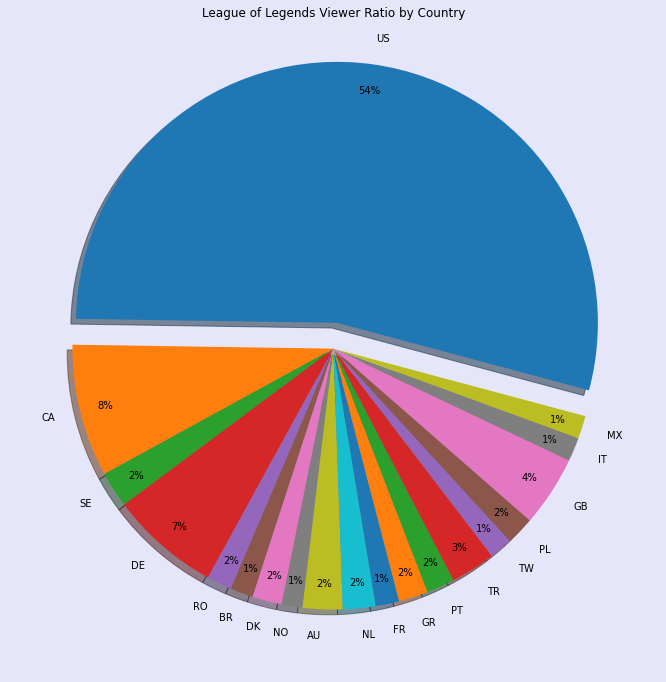

In [6]:
plt.figure(figsize=(12, 12), facecolor='lavender')
explode = [0 for i in range(len(truncated_c))]
explode[0] = 0.1
plt.pie(truncated_c, labels=truncated_l, explode=explode, shadow=True, startangle=345, autopct='%1.0f%%', pctdistance=0.9)
plt.title('League of Legends Viewer Ratio by Country')
#plt.legend(truncated_l)
plt.show()

In [7]:
from datetime import datetime
hour = range(24)
us_viewers = twitch_stream[(twitch_stream.country == 'US')]

def convert_to_hour(date_str):
    new_date = datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S')
    return new_date.hour

us_viewers.time = us_viewers.apply(lambda x: convert_to_hour(x[0]), axis=1)
viewer_hour = us_viewers.time.groupby(us_viewers.time).count()

C:\Users\Andy\miniconda3\lib\site-packages\pandas\core\generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


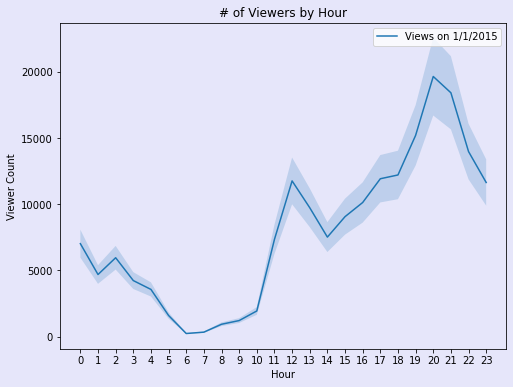

In [8]:
plt.figure(figsize=(8, 6), facecolor='lavender')
ax = plt.subplot(facecolor='lavender')
y_upper = [vh + vh*0.15 for vh in viewer_hour]
y_lower = [vh - vh*0.15 for vh in viewer_hour]
plt.plot(hour, viewer_hour)
plt.fill_between(hour, y_upper, y_lower, alpha=0.2)
plt.title('# of Viewers by Hour')
plt.xlabel('Hour')
plt.ylabel('Viewer Count')
ax.set_xticks(hour)
plt.legend(['Views on 1/1/2015'])
plt.show()